<a href="https://colab.research.google.com/github/Letlhogonolo01/data-annotation-mini-project/blob/main/SA_Patent_Intelligence_Initiative_(SAPII).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This is how I Uploaded the PDF's to Google Colab

from google.colab import files

uploaded = files.upload()  # This opens a file upload dialog

Saving bluetooth_200606656A.pdf to bluetooth_200606656A.pdf
Saving container_198906224A.pdf to container_198906224A.pdf
Saving vending_machine_199809818B.pdf to vending_machine_199809818B.pdf


In [2]:
# Install Tesseract OCR and Required Libraries

!apt-get install -y poppler-utils
!apt-get install -y tesseract-ocr
!pip install pytesseract pdf2image pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Fetched 186 kB in 0s (464 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.6_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.6) ...
Setting up poppler-utils (22.02.0-2ubuntu0.6) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
T

In [3]:
#This code extracts text from the uploaded PDF and save it to .txt

import pytesseract
from pdf2image import convert_from_path
import os

# Define PDF file paths (Replace these with your actual uploaded file names)
pdf_files = [
    "bluetooth_200606656A.pdf",
    "container_198906224A.pdf",
    "vending_machine_199809818B.pdf"
]

# Process each PDF
for pdf_path in pdf_files:
    # Convert PDF pages to images
    pages = convert_from_path(pdf_path)

    # Extract text from each page
    extracted_text = "\n".join([pytesseract.image_to_string(page) for page in pages])

    # Define output text filename
    txt_filename = pdf_path.split("/")[-1].replace(".pdf", ".txt")

    # Save extracted text
    with open(f"{txt_filename}", "w", encoding="utf-8") as f:
        f.write(extracted_text)

    print(f"✅ Text extraction complete for {pdf_path}! Saved as {txt_filename}")





✅ Text extraction complete for bluetooth_200606656A.pdf! Saved as bluetooth_200606656A.txt
✅ Text extraction complete for container_198906224A.pdf! Saved as container_198906224A.txt
✅ Text extraction complete for vending_machine_199809818B.pdf! Saved as vending_machine_199809818B.txt


In [4]:
# Verify Extracted Text

# Choose one file to preview (change filename if needed)
preview_file = "container_198906224A.txt"

# Read and display first 1000 characters
with open(preview_file, "r", encoding="utf-8") as f:
    preview_text = f.read()

print(preview_text[:1000])  # Show first 1000 characters

SPOOR

   

 

AND FISHER : FORM P.8.
(To be lodged in duplicate}

REPUBLIC OF SOUTH AFRICA
PATENTS ACT, 1978

PUBLICATION PARTICULARS AND ABSTRACT
(Section 32(3}{a) — Regulations 22(1)(g) and 31)

OFFICIAL APPLICATION NO. LODGING DATE ACCEPTANCE DATE

NOT FOR PUBLICATION

CLASSIFIED BY:

SFE

 

FULL NAME(S) OF APPLICANT(S)
PLASTICON PATENTS, S.A.

 

FULL NAME(S) OF tNVENTOR(S)

Herbert STRASSHEIMER

 

EARLIEST PRIORITY CLAIMED

COUNTRY NUMBER . DATE

262,781 26.16.88

TITLE OF [INVENTION

CONTAINER

ABSTRACT (NOT MORE THAN 150 WORDS) NUMBER OF SHEETS 22 A ‘3

*1f no classification Is furnished. Form P.9 should accompany this form
The figure of the drawings to which the abstract refers Is attached

A ABSTRACT OF THE DISCLOSUPE
Ss

A plastic prefcrm for fcerming Flow molded plastic
containers wherein the inside wall face cf the tubular
boéy portion adjacent the bottom structure and extending
onto the bottom structure has a plurality of faces with
termina] portions thereof. Scallop-s

In [5]:
# Download all extracted text files

for pdf_path in pdf_files:
    output_filename = pdf_path.split("/")[-1].replace(".pdf", ".txt")
    files.download(output_filename)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Clean Extracted Text

import re

# List of extracted text files (Update filenames based on your uploaded patents)
text_files = [
    "bluetooth_200606656A.txt",
    "container_198906224A.txt",
    "vending_machine_199809818B.txt"
]

cleaned_files = []  # Store filenames for downloading

# Clean and save each text file
for file_path in text_files:
    try:
        # Read extracted text using 'latin-1' encoding or ignore errors
        with open(file_path, "r", encoding="latin-1", errors="ignore") as f:
            raw_text = f.read()

        # Remove extra spaces, special characters, and broken words
        cleaned_text = re.sub(r"\s+", " ", raw_text)  # Remove extra spaces/newlines
        cleaned_text = re.sub(r"[^a-zA-Z0-9\s.,]", "", cleaned_text)  # Remove special characters

        # Define cleaned output filename
        cleaned_filename = file_path.replace(".txt", "_cleaned.txt")

        # Save cleaned text
        with open(cleaned_filename, "w", encoding="utf-8") as f:
            f.write(cleaned_text)

        cleaned_files.append(cleaned_filename)  # Store cleaned file name
        print(f"✅ Cleaned text saved as {cleaned_filename}")

    except Exception as e:
        print(f"⚠️ Error processing {file_path}: {e}")

# Download all cleaned files
for file in cleaned_files:
    files.download(file)

print("✅ All cleaned text files have been downloaded!")



✅ Cleaned text saved as bluetooth_200606656A_cleaned.txt
✅ Cleaned text saved as container_198906224A_cleaned.txt
✅ Cleaned text saved as vending_machine_199809818B_cleaned.txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ All cleaned text files have been downloaded!


In [7]:
import re
import json

# List of cleaned text files
cleaned_files = [
    "bluetooth_200606656A_cleaned.txt",
    "container_198906224A_cleaned.txt",
    "vending_machine_199809818B_cleaned.txt"
]

# Function to extract structured data using regex
def extract_sections(text):
    # Extract Title of the Invention
    title_match = re.search(r"Title of invention\s*(.*)", text, re.IGNORECASE)
    title = title_match.group(1).strip() if title_match else "Not Found"

    # Extract Abstract
    abstract_match = re.search(r"Abstract(.*?)(?=Background|Description|Claims)", text, re.DOTALL | re.IGNORECASE)
    abstract_text = abstract_match.group(1).strip() if abstract_match else "Not Found"

    # Extract Description
    description_match = re.search(r"Description(.*?)(?=Claims)", text, re.DOTALL | re.IGNORECASE)
    description_text = description_match.group(1).strip() if description_match else "Not Found"

    # Extract Claims
    claims_match = re.search(r"Claims(.*)", text, re.DOTALL | re.IGNORECASE)
    claims_text = claims_match.group(1).strip() if claims_match else "Not Found"

    return title, abstract_text, description_text, claims_text

# Convert extracted sections to COCO format
coco_format = {"images": [], "annotations": [], "categories": []}

# Category mapping
categories = [
    {"id": 1, "name": "Title of the Invention"},
    {"id": 2, "name": "Abstract"},
    {"id": 3, "name": "Description"},
    {"id": 4, "name": "Claims"}
]

# Add categories to COCO structure
coco_format["categories"] = categories

# Process each cleaned text file
for idx, file_path in enumerate(cleaned_files, start=1):
    # Read cleaned text
    with open(file_path, "r", encoding="utf-8") as f:
        cleaned_text = f.read()

    # Extract sections
    title, abstract_text, description_text, claims_text = extract_sections(cleaned_text)

    # Add image (patent document reference)
    coco_format["images"].append({"id": idx, "file_name": file_path.replace("_cleaned.txt", ".pdf")})

    # Add annotations
    coco_format["annotations"].append({"id": idx * 10 + 1, "image_id": idx, "category_id": 1, "text": title})
    coco_format["annotations"].append({"id": idx * 10 + 2, "image_id": idx, "category_id": 2, "text": abstract_text})
    coco_format["annotations"].append({"id": idx * 10 + 3, "image_id": idx, "category_id": 3, "text": description_text})
    coco_format["annotations"].append({"id": idx * 10 + 4, "image_id": idx, "category_id": 4, "text": claims_text})

# Save as JSON
json_path = "structured_patent_data.json"
with open(json_path, "w", encoding="utf-8") as f:
    json.dump(coco_format, f, indent=4)

print("✅ COCO-formatted data saved as 'structured_patent_data.json'.")


✅ COCO-formatted data saved as 'structured_patent_data.json'.


In [8]:
# Download COCO JSON File

files.download("structured_patent_data.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# This is how I Uploaded the files to Google Colab

uploaded = files.upload()

Saving Patent_Annotated_Dataset.csv to Patent_Annotated_Dataset.csv


In [64]:
# Load and Inspact CSV Data:

import pandas as pd

# Load the dataset
file_path = "Patent_Annotated_Dataset.csv"
df = pd.read_csv(file_path)

# Display basic info
df.info()

# Show first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   annotation_id  3 non-null      int64  
 1   annotator      3 non-null      int64  
 2   created_at     3 non-null      object 
 3   id             3 non-null      int64  
 4   label          3 non-null      object 
 5   lead_time      3 non-null      float64
 6   text           3 non-null      object 
 7   updated_at     3 non-null      object 
dtypes: float64(1), int64(3), object(4)
memory usage: 324.0+ bytes


,annotation_id,annotator,created_at,id,label,lead_time,text,updated_at
0,1,1,2025-03-03T08:20:37.092306Z,1,"[{""start"":442,""end"":451,""text"":""CONTAINER"",""la...",730.750,SPOOR AND FISHER FORM P.8. To be lodged in du...,2025-03-03T08:20:37.092306Z
1,2,1,2025-03-03T08:35:09.139732Z,2,"[{""start"":592,""end"":622,""text"":""VENDING MACHIN...",860.148,"D.M. KISCH INC. , Johannesburg Form P.8 REPUB...",2025-03-03T08:35:09.139732Z
2,3,1,2025-03-03T08:44:52.273862Z,3,"[{""start"":525,""end"":562,""text"":"" Bluetooth Ena...",574.668,"FORM P8 REPUBLIC OF SOUTH AFRICA PATENTS ACT,...",2025-03-03T08:44:52.273862Z


In [65]:
# Display some values in the 'label' column to check its format
df['label'].head(5)


,label
0,"[{""start"":442,""end"":451,""text"":""CONTAINER"",""la..."
1,"[{""start"":592,""end"":622,""text"":""VENDING MACHIN..."
2,"[{""start"":525,""end"":562,""text"":"" Bluetooth Ena..."


In [66]:
import ast

# Take one sample row to see if the function works
sample_label = df['label'].iloc[0]  # Get first row
print("Raw label data:", sample_label)

# Try extracting annotations
try:
    annotations = ast.literal_eval(sample_label)
    extracted_text = {entry["label"]: entry["text"] for entry in annotations}
    print("Extracted:", extracted_text)
except Exception as e:
    print("Error:", e)


Raw label data: [{"start":442,"end":451,"text":"CONTAINER","labels":["Title of the Invention"]},{"start":679,"end":1124,"text":" A plastic prefcrm for fcerming Flow molded plastic containers wherein the inside wall face cf the tubular boy portion adjacent the bottom structure and extending onto the bottom structure has a plurality of faces with termina portions thereof. Scallopshaped segments are provided connecting the terminal portions of each face to initiate deformation prior to deformation of the faces and thereby have an increased rate and degree of orientation","labels":["Abstract"]},{"start":10221,"end":16866,"text":"Referring now to the drawings in detail, a plastic parison or preform 10 is formed by injection molding from a synthetic resin which can be biaxiaily oriented, as for example poly ethylene terephthalate. The preform 10 has a neck portion 11 defining an opening 12 and it may be provided with external threads 13 to serve as the site for attachment of a cap on the fin

In [67]:
import ast

def extract_annotations(label_data):
    try:
        annotations = ast.literal_eval(label_data)  # Convert string to list of dictionaries
        extracted_text = {}
        for entry in annotations:
            label_name = entry["labels"][0]  # Get the first label (assuming one per entry)
            extracted_text[label_name] = entry["text"]
        return extracted_text
    except Exception as e:
        print("Error in extraction:", e)
        return {}  # Return empty dictionary in case of failure


In [68]:
sample_label = df['label'].iloc[0]
print("Raw label:", sample_label)

extracted_sample = extract_annotations(sample_label)
print("Extracted sample:", extracted_sample)


Raw label: [{"start":442,"end":451,"text":"CONTAINER","labels":["Title of the Invention"]},{"start":679,"end":1124,"text":" A plastic prefcrm for fcerming Flow molded plastic containers wherein the inside wall face cf the tubular boy portion adjacent the bottom structure and extending onto the bottom structure has a plurality of faces with termina portions thereof. Scallopshaped segments are provided connecting the terminal portions of each face to initiate deformation prior to deformation of the faces and thereby have an increased rate and degree of orientation","labels":["Abstract"]},{"start":10221,"end":16866,"text":"Referring now to the drawings in detail, a plastic parison or preform 10 is formed by injection molding from a synthetic resin which can be biaxiaily oriented, as for example poly ethylene terephthalate. The preform 10 has a neck portion 11 defining an opening 12 and it may be provided with external threads 13 to serve as the site for attachment of a cap on the finished

In [69]:
df['annotations'] = df['label'].apply(lambda x: extract_annotations(x) if pd.notnull(x) else {})

# Print a few extracted annotations
print(df['annotations'].head())


0    {'Title of the Invention': 'CONTAINER', 'Abstr...
1    {'Title of the Invention': 'VENDING MACHINE CO...
2    {'Title of the Invention': ' Bluetooth Enabled...
Name: annotations, dtype: object


In [70]:
df_annotations = pd.json_normalize(df['annotations'])
print(df_annotations.head())  # Check the structure


                  Title of the Invention  \
0                              CONTAINER   
1         VENDING MACHINE COOKING DEVICE   
2   Bluetooth Enabled PSSTN Access Point   

                                            Abstract  \
0   A plastic prefcrm for fcerming Flow molded pl...   
1  A vending machine for vending a cooked product...   
2  This invention relates to a means and method f...   

                                         Description  \
0  Referring now to the drawings in detail, a pla...   
1  The present invention relates to vending machi...   
2  Description of embodiments of the invention Th...   

                                              Claims  
0  1. A plastic preform for forming blow molded p...  
1  1. A vending machine for vending a cooked prod...  
2  1. A method of managing phone calls on a combi...  


In [71]:
df = pd.concat([df, df_annotations], axis=1)

In [72]:
df = df.rename(columns={
    "Title of the Invention": "Title",
    "Abstract": "Abstract",
    "Description": "Description",
    "Claims": "Claims"
})


In [73]:
df = df.drop(columns=['label', 'annotations'], errors='ignore')

In [74]:
print(df.head())  # Display the cleaned dataset
print(df.columns)  # Check available columns

   annotation_id  annotator                   created_at  id  lead_time  \
0              1          1  2025-03-03T08:20:37.092306Z   1    730.750   
1              2          1  2025-03-03T08:35:09.139732Z   2    860.148   
2              3          1  2025-03-03T08:44:52.273862Z   3    574.668   

                                                text  \
0  SPOOR AND FISHER  FORM P.8. To be lodged in du...   
1   D.M. KISCH INC. , Johannesburg Form P.8 REPUB...   
2   FORM P8 REPUBLIC OF SOUTH AFRICA PATENTS ACT,...   

                    updated_at                                  Title  \
0  2025-03-03T08:20:37.092306Z                              CONTAINER   
1  2025-03-03T08:35:09.139732Z         VENDING MACHINE COOKING DEVICE   
2  2025-03-03T08:44:52.273862Z   Bluetooth Enabled PSSTN Access Point   

                                            Abstract  \
0   A plastic prefcrm for fcerming Flow molded pl...   
1  A vending machine for vending a cooked product...   
2  This inven

In [77]:
import pandas as pd

# Load the dataset
file_path = "Patent_Annotated_Dataset.csv"  # Adjust the path if needed
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['annotator', 'created_at', 'id', 'lead_time', 'updated_at']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Save the cleaned dataset
cleaned_file_path = "Patent_Annotated_Dataset_Cleaned.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

# Provide download link if using Google Colab
from google.colab import files
files.download(cleaned_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following is data analyses

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import re

In [79]:
# Load the dataset
file_path = "Patent_Annotated_Dataset_Cleaned.csv"
df = pd.read_csv(file_path)

In [80]:
# Display basic dataset information
print("Dataset Info:")
df.info()
print("\nBasic Statistics:")
print(df.describe(include='all'))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   annotation_id  3 non-null      int64 
 1   text           3 non-null      object
 2   Title          3 non-null      object
 3   Abstract       3 non-null      object
 4   Description    3 non-null      object
 5   Claims         3 non-null      object
dtypes: int64(1), object(5)
memory usage: 276.0+ bytes

Basic Statistics:
        annotation_id                                               text  \
count             3.0                                                  3   
unique            NaN                                                  3   
top               NaN  SPOOR AND FISHER  FORM P.8. To be lodged in du...   
freq              NaN                                                  1   
mean              2.0                                                NaN   
std         

In [81]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
annotation_id    0
text             0
Title            0
Abstract         0
Description      0
Claims           0
dtype: int64


In [82]:
# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


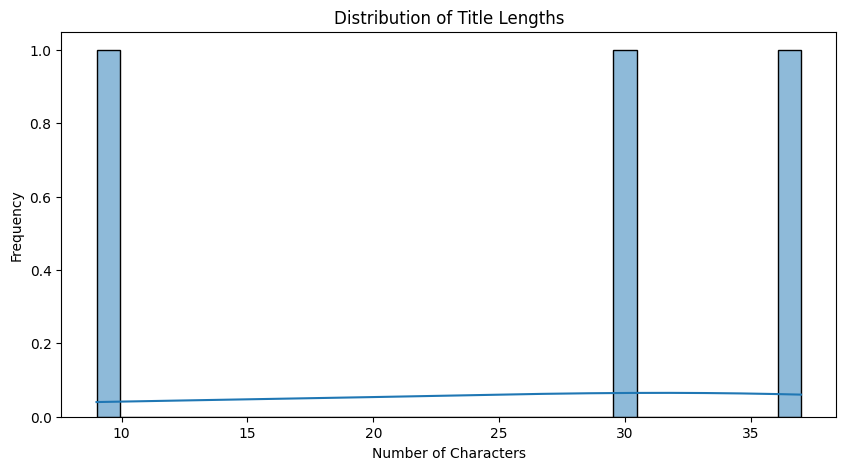

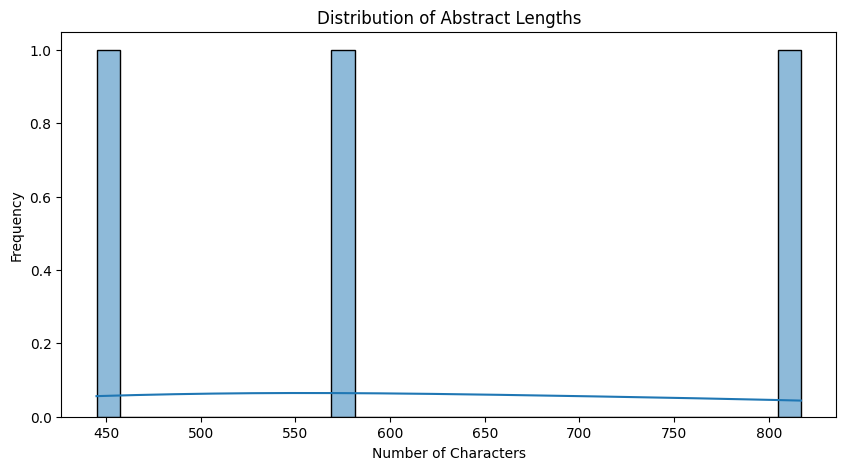

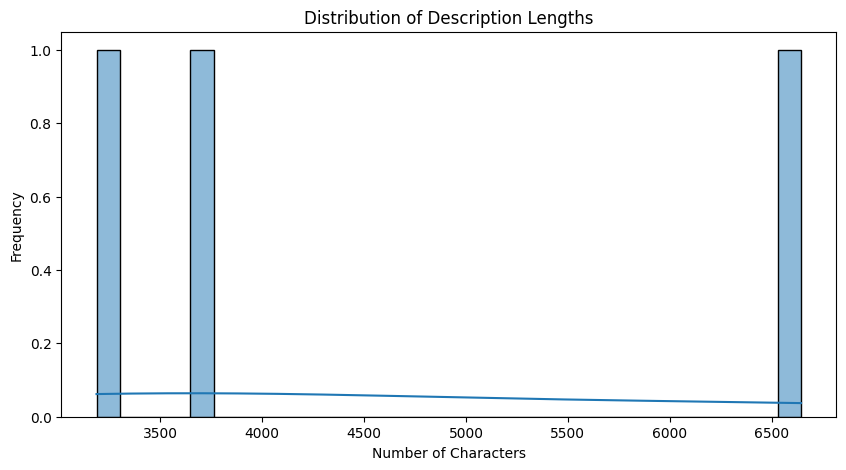

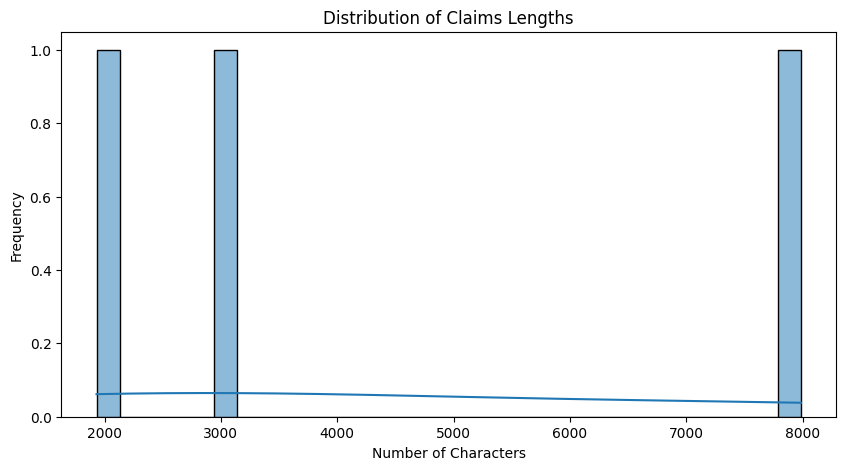

In [83]:
# Distribution of text lengths
def text_length_distribution(column_name):
    df[column_name + '_length'] = df[column_name].astype(str).apply(len)
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column_name + '_length'], bins=30, kde=True)
    plt.title(f"Distribution of {column_name} Lengths")
    plt.xlabel("Number of Characters")
    plt.ylabel("Frequency")
    plt.show()

for col in ['Title', 'Abstract', 'Description', 'Claims']:
    text_length_distribution(col)

In [84]:
# Word frequency analysis
def get_most_common_words(column, num_words=20):
    all_text = ' '.join(df[column].dropna().astype(str).str.lower())
    words = re.findall(r'\b[a-zA-Z]{3,}\b', all_text)  # Extract words with at least 3 letters
    word_counts = Counter(words).most_common(num_words)
    return word_counts

for col in ['Title', 'Abstract', 'Claims']:
    print(f"\nMost common words in {col}:")
    print(get_most_common_words(col))


Most common words in Title:
[('container', 1), ('vending', 1), ('machine', 1), ('cooking', 1), ('device', 1), ('bluetooth', 1), ('enabled', 1), ('psstn', 1), ('access', 1), ('point', 1)]

Most common words in Abstract:
[('the', 26), ('and', 12), ('vessel', 7), ('for', 6), ('bottom', 5), ('phone', 5), ('network', 5), ('has', 4), ('central', 4), ('bluetooth', 4), ('adjacent', 3), ('cooking', 3), ('disposed', 3), ('its', 3), ('axis', 3), ('drive', 3), ('baskets', 3), ('mechanism', 3), ('plastic', 2), ('face', 2)]

Most common words in Claims:
[('the', 193), ('and', 46), ('phone', 41), ('wireless', 34), ('according', 33), ('pstn', 30), ('calls', 28), ('protocol', 28), ('transceiver', 28), ('mobile', 24), ('network', 23), ('said', 21), ('claim', 21), ('method', 19), ('preform', 17), ('line', 17), ('including', 16), ('managing', 16), ('which', 15), ('wherein', 15)]


In [87]:
import json
import pandas as pd

# Load the cleaned dataset
csv_path = "Patent_Annotated_Dataset_Cleaned.csv"
df = pd.read_csv(csv_path)

# Initialize COCO format structure
coco_format = {
    "info": {
        "description": "Patent Dataset",
        "version": "1.0",
        "year": 2025,
        "contributor": "SA Patent Intelligence Initiative",
        "date_created": "2025-03-05"
    },
    "licenses": [],
    "categories": [
        {"id": 1, "name": "Title", "supercategory": "text"},
        {"id": 2, "name": "Abstract", "supercategory": "text"},
        {"id": 3, "name": "Description", "supercategory": "text"},
        {"id": 4, "name": "Claims", "supercategory": "text"}
    ],
    "images": [],
    "annotations": []
}

# Convert patents into "images"
for idx, row in df.iterrows():
    image_id = idx + 1  # Unique identifier for each patent
    coco_format["images"].append({
        "id": image_id,
        "file_name": f"patent_{image_id}.txt",  # Simulating a file representation
        "width": None,
        "height": None
    })

    # Convert text fields into "annotations"
    for category in ["Title", "Abstract", "Description", "Claims"]:
        annotation_id = len(coco_format["annotations"]) + 1
        coco_format["annotations"].append({
            "id": annotation_id,
            "image_id": image_id,
            "category_id": [c["id"] for c in coco_format["categories"] if c["name"] == category][0],
            "bbox": None,  # Bounding box not applicable for text
            "segmentation": None,  # Segmentation not applicable for text
            "text": row[category],  # Store actual text content
            "area": len(str(row[category]))  # Length of text as a placeholder for area
        })

# Save to JSON file
coco_json_path = "Patent_COCO_Format.json"
with open(coco_json_path, "w", encoding="utf-8") as f:
    json.dump(coco_format, f, ensure_ascii=False, indent=4)

print(f"COCO-formatted dataset saved as {coco_json_path}")


COCO-formatted dataset saved as Patent_COCO_Format.json
